In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
 
tau_lst = [0,0.25,0.5,0.75,1,1.5,1.25,1.55,1.6]
 
T_lst=[50,100,500]

In [206]:
p1lst = []
p2lst = []
#p3lst = []

for a in range(len(tau_lst)):
    for b in range(len(T_lst)):
        tau = tau_lst[a]
        T =T_lst[b]# sample size

        p1now = np.load('spd_var_pval_debias_tau_'+str(a)+'_T_'+str(b)+'.npy')
        p2now=np.load('spd_var_pval_bias_tau_'+str(a)+'_T_'+str(b)+'.npy')
    
        

        #p3now=np.load('spd_var_pval_eu_tau_'+str(a)+'_T_'+str(b)+'.npy')
        p1lst.append((tau,np.rint(T) , np.mean(p1now<=0.05) ))
        p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))
        #p3lst.append((tau,np.rint(T) , np.mean(p3now<=0.05)))
null= np.where(p1now>=0.05)
null=null[0]

In [213]:
p1lst = []
p2lst = []
p3lst = []

for a in range(len(tau_lst)):
    if(a!=7):
        for b in range(len(T_lst)):
            tau = tau_lst[a]
            T =T_lst[b]# sample size

            p1now = np.load('spd_var_pval_debias_tau_'+str(a)+'_T_'+str(b)+'.npy')
            p2now=np.load('spd_var_pval_bias_tau_'+str(a)+'_T_'+str(b)+'.npy')

            if((a==8)&(b==2)):
                for i in range(null.shape[0]):
                    p1now[null] = pval1_null_lst
                    p2now[null] = pval2_null_lst

            p3now=np.load('spd_var_pval_eu_tau_'+str(a)+'_T_'+str(b)+'.npy')
            p1lst.append((tau,np.rint(T) , np.mean(p1now<=0.05) ))
            p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))
            p3lst.append((tau,np.rint(T) , np.mean(p3now<=0.05)))



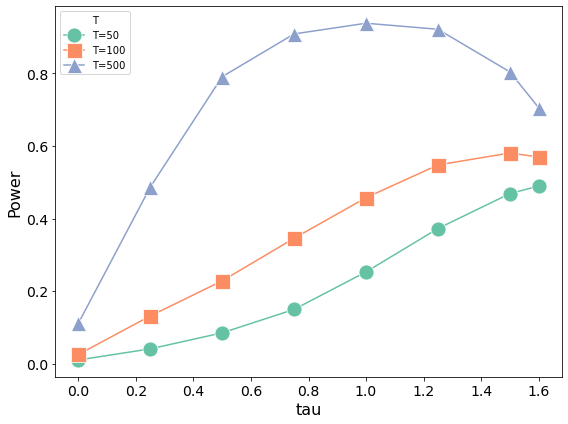

In [218]:
# Assuming p3lst is defined and contains your data
p3_array = np.array(p3lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p3_df = pd.DataFrame(p3_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p3_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_spd_var_B2_update.png',facecolor='w')

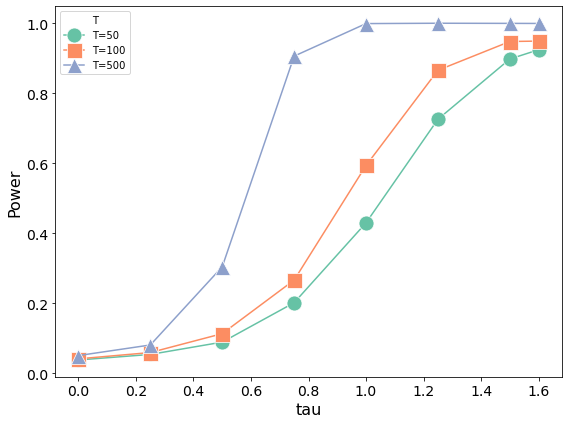

In [219]:
# Assuming p3lst is defined and contains your data
p1_array = np.array(p1lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p1_df = pd.DataFrame(p1_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p1_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_spd_var_update.png',facecolor='w')

In [201]:
p1_df

,tau,T,p
0,0.00,50.0,0.0380
1,0.00,100.0,0.0412
2,0.00,500.0,0.0506
3,0.25,50.0,0.0538
4,0.25,100.0,0.0592
5,0.25,500.0,0.0808
6,0.50,50.0,0.0890
7,0.50,100.0,0.1132
8,0.50,500.0,0.3042
9,0.75,50.0,0.2016


In [ ]:
#1.55,50,0.9128; 1.55,100,0.9494; 1.6,50,0.9242;1.6,100,0.949;

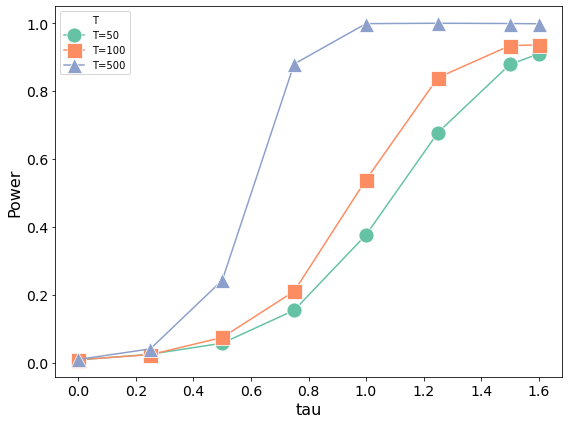

In [220]:
# Assuming p3lst is defined and contains your data
p2_array = np.array(p2lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p2_df = pd.DataFrame(p2_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p2_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in sphere', fontsize=15)
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(title='T')
plt.tight_layout()


plt.savefig('Power_spd_var_B1_update.png',facecolor='w')

In [121]:


import numpy as np
import sys
import time
from multiprocess import Pool
import matplotlib.pyplot as plt
import warnings

import geomstats.backend as gs
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.geometry.matrices import Matrices, MatricesMetric

from geomstats.geometry.symmetric_matrices import SymmetricMatrices


from geomstats.geometry import spd_matrices

d = 3
mfd = spd_matrices.SPDMetricAffine(n=d, power_affine=1)
aux = spd_matrices.SPDMatrices(n=d)
# cpunum= s3 
# T_lst=[50,100,500]
# tau =tau_lst[s1]
# nsamples = T_lst[s2]
# print('tau:'+str(tau))
# print('nsamples:'+str(nsamples))
# print('numcpu:'+str(cpunum))
# print('with warnings')
mut =mfd.geodesic(gs.eye(d),end_point=2* gs.eye(d))
def generate_sample_tangent_space(base=gs.eye(d), n_samples=1, sigma=1):
    # generate i.i.d gaussian noise on tangent space
    size = (n_samples, d, d) if n_samples != 1 else (d, d)
    tangent_vec_at_id_aux = gs.random.normal(scale=sigma, size=size)
    tangent_vec_at_id = 0.5 * (tangent_vec_at_id_aux + Matrices.transpose(
        tangent_vec_at_id_aux
    ))
    # sqrt_base_point = gs.linalg.sqrtm(base_point)
    return tangent_vec_at_id


def generate_random_sample(base=gs.eye(d), n_samples=1, sigma=1):
    # generate sample with Frechet mean equal the given base point.
    tv = generate_sample_tangent_space(base=base, n_samples=n_samples, sigma=sigma)
    return mfd.exp(tangent_vec=tv, base_point=base)


def generate_ar_ts(base=gs.eye(d), n_samples=1, sigma=1, rho=0.5,tau=1,bt=2* gs.eye(d)):
    # generate AR(1)  process X_t -mu = rho(t/n)(X_{t-1}-mu)+epsilon
    ## rho(u) = 0.3+0.2*u^2
    
   
    if n_samples == 1:
        return generate_sample_tangent_space(base=base, n_samples=1, sigma=1)
    else:
        data_tv = np.zeros((n_samples, d, d))
        data= np.zeros((n_samples, d, d))
        data_tv[0, :, :] = generate_sample_tangent_space(base=base, n_samples=1, sigma=1)
        
        data[0] = mfd.exp(tangent_vec=data_tv[0],base_point=base)
        
        for i in range(1, n_samples):
            u = i / n_samples
            #             rhotmp =  rho+0.2*(u**2)
            
            #rhotmp = rho + 0.5*u*(1-u)
            delta = data_tv[i - 1, :, :]
            rhotmp = rho+0.25*u
            Amatrix = np.full((3, 3), 0.9 * rhotmp)  # Initialize all entries with 0.8 * rhotmp
            np.fill_diagonal(Amatrix,  1.1* rhotmp)
            
            inten = ( (2.5*(u-0.25)) **2+0.2 )*sigma
            
            
            noise = generate_sample_tangent_space(base=gs.eye(d), n_samples=1, sigma=(inten/(1+3*tau)))
#            noise[0,0] =inten*noise[0,0]
#            noise[1,2] =inten*noise[1,2]
#            noise[2,1] =inten*noise[2,1]
#            noise[2,2] =inten*noise[2,2]
            if(tau>0):
                data_tv[i] = mfd.parallel_transport(tangent_vec=Amatrix * (delta) + noise, base_point=base, end_point=mut(tau*u))
                data[i] = mfd.exp(tangent_vec= data_tv[i], base_point=mut(tau*u))
            else:
                data_tv[i] = Amatrix * (delta) + noise
                                                    
                data[i] = mfd.exp(tangent_vec= data_tv[i], base_point=base)
       
        #data = mfd.exp(tangent_vec=data_tv, base_point=base)
        return data

def make_spd(A, eps=1e-8):
    A = (A + A.T) / 2
    min_eig = np.min(np.linalg.eigvalsh(A))
    if min_eig <= 0:
        A += (-min_eig + eps) * np.eye(A.shape[0])
    return A




def E_comp(mu):
    sqrt_mu = gs.linalg.sqrtm(mu)
    E = np.zeros((6, 3, 3))
    k = 0
    for i in range(3):
        for j in range(i, 3):
            eiej = np.zeros((3, 3))
            if (i == j):
                eiej[i, i] = 1
                # E[k,:,:]=np.dot(sqrt_mu,np.dot(eiej,sqrt_mu))
            else:
                eiej[i, j] = eiej[j, i] = 1 / np.sqrt(2)

            E[k, :, :] = np.dot(sqrt_mu, np.dot(eiej, sqrt_mu))

            k = k + 1
    return E


def Hess(mu, Y, V):
    # mu: base point
    # Y: pt to map
    # V: direction
    # mu_root: square root of mu
    n = Y.shape[0]

    H = np.zeros((n, 3, 3))
    for k in range(n):
        # W = mfd.log(Y[k],mu)
        Yinv = np.linalg.inv(Y[k])
        res = np.dot(V, aux.logm(np.dot(Yinv, mu))
                     ) - np.dot(aux.logm(np.dot(mu, Yinv)), V
                                ) + 2 * np.dot(mu, aux.differential_log(np.dot(Yinv, V), np.dot(Yinv, mu)))
        H[k] = -0.5 * res
    # Hess_tensor = np.zeros((6,3,3))

    return H


def coordinate(mu, E, V):
    # mu: base point
    # E: orthonormal base
    # V: tangent vector
    v = np.zeros(6)
    for k in range(6):
        v[k] = mfd.inner_product(V, E[k], mu)
    return v


def coortomat(mu, E, y):
    # mu: base point
    # E: orthonormal base
    # V: tangent vector
    # y = np.zeros(6)
    V = np.zeros((3, 3))
    for k in range(6):
        V = V + y[k] * E[k]
    return V


def Hess_mat(mu, Y,  E):
    # mu: base point
    # Y: pt to map

    n = Y.shape[0]
    #E = E_comp(mu)
    X = mu
    Hmat = np.zeros((n, 6, 6))

    for k in range(n):
        for i in range(6):
            for j in range(6):
                t = 0.0000001
                V = E[i]
                end = mfd.exp(t * V, X)
                Wend = mfd.log(Y[k], end)
                W = mfd.log(Y[k], X)
                PWend1 = mfd.parallel_transport(Wend, end, direction=mfd.log(X, end))
                # PWend2= mfd.parallel_transport(Wend,end,end_point=X)
                HV = (PWend1 - W) / t

                U = E[j]
                Hmat[k,i,j] = mfd.inner_product(HV, U, X)

    #     for i in range(6):
    #         for j in range(6):
    #             Hei = Hess(mu,Y,E[i])
    #             for k in range(n):
    #                 Hmat[k,i,j] =  mfd.inner_product(Hei[k],E[j],mu)

    return Hmat

def Hess_mean(mu, Y, V):
    H = Hess(mu, Y, V)
    res = np.mean(H, axis=0)
    return res


def Hinv(mu, Y, V):
    E = E_comp(mu)
    y = np.zeros(6)

    for k in range(6):
        y[k] = mfd.inner_product(E[k], V, mu)

    H_mat = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            Hei = Hess_mean(mu, Y, E[i])
            H_mat[i, j] = mfd.inner_product(Hei, E[j], mu)

    xcoef = np.dot(np.linalg.inv(H_mat), y)

    res = np.zeros((3, 3))

    for k in range(6):
        res = res + xcoef[k] * E[k]

    return res



def resvec_to_sum(res_vec, w=3):
    # local sum
    dim = res_vec.shape[1]
    N = res_vec.shape[0]
    res = np.zeros((N - w + 1, dim))
    for i in range(dim):
        res[:, i] = np.convolve(res_vec[:, i], np.ones(w), 'valid')

    return res


def gamma_m(res_vec, w=3):
    localvar = resvec_to_sum(res_vec, w) ** 2
    n, dim = localvar.shape
    res = np.zeros((n, dim))
    for i in range(dim):
        res[:, i] = np.cumsum(localvar[:, i]) / (w * n)
    return (res)


def volatity(res_vec, wlst):
    wm = max(wlst)
    L = len(wlst)
    n, dim = res_vec.shape
    localvar_res = np.zeros(shape=(n - wm + 1, dim, L))
    for i in range(L):
        localvar_res[:, :, i] = gamma_m(res_vec, wlst[i])[:(n - wm + 1), ]

    vol = np.zeros((n - wm + 1, dim, L - 2))
    for j in range(n - wm + 1):
        for k in range(dim):
            for i in range(L - 4):
                vol[j, k, i] = np.std(localvar_res[j, k, i:(i + 3)])

    vol_sum = np.sum(vol, axis=1)

    return np.max(vol_sum, axis=0)


def select_window(res_vec, wlst):
    vol = volatity(res_vec, wlst)
    idx = np.argmin(np.max(vol, axis=0))
    return (wlst[idx + 1])


def local_sum(res, w=3):
    # local sum for reisduals
    dim = res.shape[1]
    N = res.shape[0]
    locsum = np.zeros((N - w + 1, dim, dim))
    for i in range(dim):
        for j in range(dim):
            locsum[:, i, j] = np.convolve(res[:, i, j], np.ones(w), 'valid')

    return locsum


def generate_Phi(locsum):
    # Philst = np.zeros(locsum.shape)
    n = locsum.shape[0]
    g = np.random.normal(size=n)
    g = g.reshape((n, 1, 1))
    dPhi = g * locsum
    Phi = np.cumsum(dPhi, axis=0)
    return Phi


def bootstrap_test(residual, data, mean, w=24, B=400, seed=2023):
    n = residual.shape[0]
    res_cusum = np.cumsum(residual/np.sqrt(n), axis=0)

    res_cusum_norm = mfd.inner_product(res_cusum, res_cusum, mean)

    Tn = np.sqrt(res_cusum_norm.max())

    B = B  # bootstrap size
    Boot_Stat = np.zeros(B)
    Boot_Stat2 = np.zeros(B)
    locsum = local_sum(residual, w=w)
    E = E_comp(mean)
    Hmat = Hess_mat(mean, data,  E)

    for i in range(B):
        # np.random.seed(seed*2023+i)
        Phi = generate_Phi(locsum) / np.sqrt(w * (n - w + 1))
        Phi2 = generate_Phi(locsum) / np.sqrt(w * (n - w + 1))

        U1 = Phi[n - w]
        U1_coor = coordinate(mean, E, U1)
        Hmat_mean = np.mean(Hmat, axis=0)
        Hmat_cumean = np.cumsum(Hmat, axis=0) / n

        y = np.dot(np.linalg.inv(Hmat_mean), U1_coor)

        Hcoor = np.zeros((n, 6))
        HHU1 = np.zeros((n, 3, 3))
        for k in range(n):
            Hcoor[k] = np.dot(Hmat_cumean[k], y)
            HHU1[k] = coortomat(mean, E, Hcoor[k])


        for k in range(n - w + 1):
            Phi[k] = Phi[k] - HHU1[k]
            Phi2[k] = Phi2[k] - (k + 1) / (n - w + 1) * Phi2[n - w]

        Phinorm = mfd.inner_product(Phi, Phi, mean)
        Phinorm2 = mfd.inner_product(Phi2, Phi2, mean)
        Boot_Stat[i] = np.sqrt(np.max(Phinorm[w:]))
        Boot_Stat2[i] = np.sqrt(np.max(Phinorm2[w:]))

    return np.mean(Boot_Stat >= Tn), np.mean(Boot_Stat2 >= Tn)



In [200]:
pval1_null_lst= np.zeros(null.shape)
pval2_null_lst= np.zeros(null.shape)

for j in range(null.shape[0]):
    seed = null[j]
    #print(j)
    np.random.seed(seed)
    bp = gs.eye(d)
      

    data = generate_ar_ts(base=bp, n_samples=500, sigma=1, rho=0.05, tau=1.5)
    fmean = FrechetMean(metric=mfd, max_iter=10000,init_point=bp, epsilon=1e-16)
    fmean.fit(data)
    mean = fmean.estimate_
    L = max(np.ceil(0.01*500), 2)
    # if nsamples < 100:
    #     L = 1
    U = max(0.05*500+1, 6)
    windows = np.arange(L, U)
    windows = (np.rint(windows)).astype(int)
    # fmean = FrechetMean(metric=mfd, max_iter=10000, epsilon=1e-10)
    # fmean.fit(data)
    # mean = fmean.estimate_
    residual = mfd.log(point=data, base_point=mean)
    residual_vec = SymmetricMatrices.to_vector(residual)
    w1 = select_window(residual_vec, windows)
    n = residual.shape[0]
    res_cusum = np.cumsum(residual/np.sqrt(n), axis=0)

    res_cusum_norm = mfd.inner_product(res_cusum, res_cusum, mean)

    Tn = np.sqrt(res_cusum_norm.max())

    B = 4000  # bootstrap size
    Boot_Stat = np.zeros(B)
    Boot_Stat2 = np.zeros(B)
    w=w1
    locsum = local_sum(residual, w=w)
    E = E_comp(mean)
    Hmat = Hess_mat(mean, data,  E)
    np.random.seed(seed+2000)
    for i in range(B):

        Phi = generate_Phi(locsum) / np.sqrt(w * (n - w + 1))
        Phi2 = generate_Phi(locsum) / np.sqrt(w * (n - w + 1))

        U1 = Phi[n - w]
        U1_coor = coordinate(mean, E, U1)
        Hmat_mean = np.mean(Hmat, axis=0)
        Hmat_cumean = np.cumsum(Hmat, axis=0) / n

        y = np.dot(np.linalg.inv(Hmat_mean), U1_coor)

        Hcoor = np.zeros((n, 6))
        HHU1 = np.zeros((n, 3, 3))
        for k in range(n):
            Hcoor[k] = np.dot(Hmat_cumean[k], y)
            HHU1[k] = coortomat(mean, E, Hcoor[k])


        for k in range(n - w + 1):
            Phi[k] = Phi[k] - HHU1[k]
            Phi2[k] = Phi2[k] - (k + 1) / (n - w + 1) * Phi2[n - w]

        Phinorm = mfd.inner_product(Phi, Phi, mean)
        Phinorm2 = mfd.inner_product(Phi2, Phi2, mean)
        Boot_Stat[i] = np.sqrt(np.max(Phinorm[w:]))
        Boot_Stat2[i] = np.sqrt(np.max(Phinorm2[w:]))

    pval1_null_lst[j] =  np.mean(Boot_Stat >= Tn)
    pval2_null_lst[j] =  np.mean(Boot_Stat2 >= Tn)

rerun = np.concatenate([[np.array(null, dtype=int)],[pval1_null_lst],[pval2_null_lst]])
np.save('rerun.npy',rerun)